In [0]:
Karen Rosibel Navas Cornejo NC14002
Teresa Elena Beltran Morales BM14005

The number of points in the first octant is: 212


The number of points in the first octant is: 212


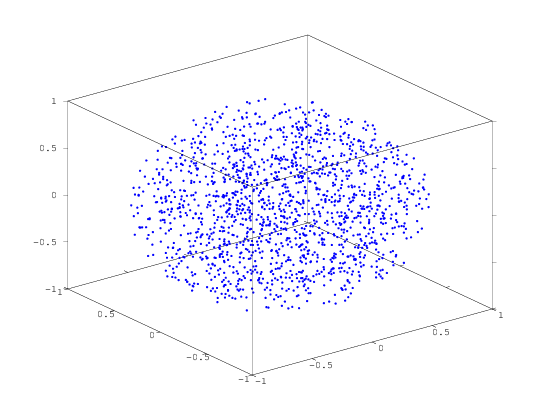

In [1]:
%problema 13.1.16
%Program that executed 1600 randoms points uniformly distribuited in the sphere defined by the unit sphere
sum=0; %Initialize the sum of the points to zero
p=1;
while p<=1600 %We create a loop that generates the 1600 points
  x=-1+(2)*rand; %We use the rand function that generates random numbers in (0,1)
  y=-1+(2)*rand;
  z=-1+(2)*rand;
  f=sqrt(x^2+y^2+z^2); %We define the function
  if (f=sqrt(x^2+y^2+z^2))<=1  %We ensure that the points are within the sphere
    plot3(x,y,z,"b.") %Plot points with plot3 function
    hold on;
    p=p+1;  %We increase the counter
    if(x>=0)&&(y>=0)&&(z>=0) %We create the condition that the points must meet in the first octant
      sum=sum+1; %We increase the counter when there is a point that satisfies the condition
    end
  end
end
fprintf('The number of points in the first octant is: %d',sum);

In [2]:
%Problem 13.2.11 B, finding an approximation of the integral double of a function for the Monte Carlo method

function [f]= integralB(n,p) %n represent the number of iterations and p the number of samples
    aprox2=0; %We initialize the sum of the p samples
    for j=1:p; 
        x=rand(1,n); %We first ensure that we have n random values of x, but in this way between 0 and 1
        x=(x*3)+2; %With this we assure n random values of x between 2 y 5
        y=rand(1,n); %We first ensure that we have n random values of y, but in this way between 0 and 1
        y=(y*3)+1; %%With this we assure n random values of y between 1 y 4
        aprox1=0; %We initialize the suma of the n iterations
        for i=1:n;
            aprox1=aprox1+(x(i)^2-y(i)^2+x(i)*y(i)-3); %We add the function x^2-y^2+xy-3 evaluated in one of the n random points
        end
        aprox1=9/n*aprox1; %Multiplying aprox1 by the measurement of the work area
        aprox2=aprox1+aprox2; %We add one of the p samples
    end  
    average=aprox2/p %The final result is the average of the p samples
end

In [3]:
integralB(10,7)

average =  101.96


In [5]:
integralB(1000,875)

average =  105.91


In [0]:
%Problem 13.2.11 D
%This is a function that takes as input the number of interactions and the number of samples and as output an approximation of a triple integral using the Monte Carlo method.
function [f]=integralD(n,p)
    aprox1=0; %Initializing the sum of a sample of n iterations
    aprox2=0; %Initializing the sum of the p samples
    for j=1:p
        k=0; %Initializing the counter of the n iterations
        while k<=n
            z=rand; %Take a value of z between [0,1]
            x=2*rand; %Take a value of x between [0.2] by the values of y and z
            y=rand; %Take a value of y between [0,1] by the values of z
            if (z^2<y && y<sqrt(z) && x<=y+z) %Putting the conditions of the intervals
                k=k+1; 
                aprox1=aprox1+x*y; %%If the conditions of intervals are fulfilled then to approx1 we will add the function evaluated in the points x and y taken
            end
        end  
        aprox2=aprox2+aprox1/n; %we add one if a the p samples.
        aprox1=0;
    end
    average=(aprox2/p)*0.3 %The final result is the average of the p samples
end


In [0]:
integralD(70,45)

In [8]:
integralD(500,200)

average =  0.10807


In [0]:
function vol = tetrahedron(n)
    m=ones(4,4); %We create a 4x4 matrix of ones
    k=1;         %We initialize k in 1, which counts the number of random points
    volume=0;  %Initialize the volume to zero 
    for i=1:n   %a for loop with a counter i from 1 to n which will allow the algorithm to be performed n times
      while k<=4
        x=rand;       % To ensure that each point is within the tetrahedron we use the rand function in this way
        y=rand;
        z=rand;
        if(z<=1-x-y) %We create the condition to get poinst inside of the tetrahedron  
          m(k,1)=x;    %We change the values of the matrix with the values of x, y ,z
          m(k,2)=y;
          m(k,3)=z;
          k=k+1;   %We increase the counter k to get another random point
        endif
      end
       volume=volume+abs(det(m))/6; %We get the volume of the four random points by the formula
      k=1;  %We reset the value of k to get another matrix
    end
    v=volume/n  %We get the final volumen by the average of all volumes
end

In [0]:
tetrahedron(50)

In [0]:
%problem 13.3.3
%Distance between two points within a sphere of radius 1, centered on the origin
prom=0; %We initialize the sum of the distances
k=1; %Counter of the amount of data
m=100; %Number of samples to calculate;
n=100; %Number of iterations of each sample
for i=1:m
  while k<=n
  x1=-1+rand*(2);%We choose the first random point from -1 to 1
  y1=-1+rand*(2);
 
  if x1^2+y1^2<=1 %If this is true, we choose the second point
    x2=-1+rand*(2); %We choose the second random point from -1 to 1
    y2=-1+rand*(2);
    if x2^2+y2^2<=1% We verify that the second point is inside the unit circle
      line([x1 x2],[y1,y2],'LineWidth',1) %We plot the line that passes through those two points
      hold on
      k=k+1;
      if (((y2-y1)/(x2-x1))*((-1)*x1)+y1==0) 
       prom=prom+(sqrt((x1-x2)^2+(y1-y2^2))); %If the line passes through the origin, add the distance defined for this situation to prom
      else
       prom=prom+(sqrt(x1^2+y1^2)+sqrt(x2^2+y2^2));%If the line does not go through the origin, we add the distance defined for this situation to prom
      endif
    endif
  endif
  endwhile
  k=0;
endfor 
average=prom/(m*n)  %The final result is the average of the m samples iterated n times


In [0]:
%Shielding.m
%Estimation for percentage of neutrons that can be expected to emerge from the other side of the lead wall
cases = 0; %The counter of the numbers of neutrons that emerge from the other side of the lead wall
for k = 1:1000 %Counter of the number of times to perform the algorithm
    x = 1;  %When occur the first collision
    for j =2:8  %We make sure that after eight collisions, all the neutron's energy is spent and No random angles will be generated for that neutron
        theta = rand*2*pi;
        x = x + cos(theta); %The neutron enters into the lead wall at a right angle to  wall and travels a unit distance
    endfor
    if x >= 5 %If x>=5 , the neutron has exited
        cases = cases + 1;
    end
endfor
probability = cases/1000 %We get the probability